#  Q1. What is the main difference between the Euclidean distance metric and the Manhattan distance metric in KNN? How might this difference affect the performance of a KNN classifier or regressor?


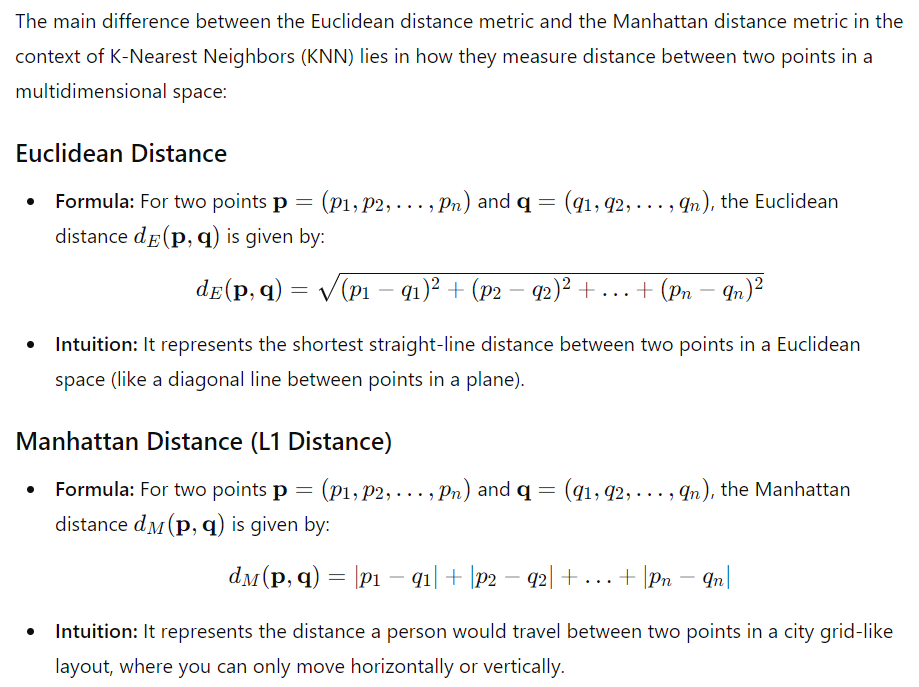



### Differences and Effects on KNN Performance

1. **Sensitivity to Dimensionality:**
   - **Euclidean Distance:** Works well in lower-dimensional spaces where the straight-line distance is meaningful. It tends to give more weight to differences in all dimensions equally.
   - **Manhattan Distance:** Can perform better in high-dimensional spaces or where the data has a grid-like structure (e.g., sparse data), as it measures the sum of absolute differences along each dimension.

2. **Impact of Outliers:**
   - **Euclidean Distance:** It squares the differences, making it sensitive to outliers that are far from other points.
   - **Manhattan Distance:** It considers absolute differences, making it less sensitive to outliers in terms of their magnitude.

3. **Performance in Different Data Structures:**
   - **Euclidean Distance:** More suitable for continuous and smooth data distributions where the direct, shortest path between points is meaningful.
   - **Manhattan Distance:** More suitable for data distributions with discrete features or when the relationships between data points are best represented by city-block-like paths.

4. **Computational Efficiency:**
   - **Manhattan Distance:** Typically faster to compute than Euclidean distance, especially in implementations where absolute differences are simpler to calculate than squared differences.

### Practical Considerations in KNN

- **Choosing the Metric:** 
  - **Euclidean Distance:** Generally preferred when the data is continuous and the relationship between features is linear or follows a smooth curve.
  - **Manhattan Distance:** Preferred when the data is sparse or has a grid-like structure, or when you want the distance metric to be less affected by outliers.

- **Cross-Validation:** 
  - It's advisable to use cross-validation to determine which distance metric (Euclidean or Manhattan) performs better for your specific dataset and task.

- **Implementation:** 
  - Most machine learning libraries (e.g., scikit-learn in Python) allow you to specify the distance metric (e.g., `metric='euclidean'` or `metric='manhattan'`) when creating a KNN classifier or regressor.

In summary, the choice between Euclidean distance and Manhattan distance in KNN can significantly impact the algorithm's performance depending on the nature of the data and the problem at hand. Understanding these differences helps in selecting the most appropriate distance metric to achieve optimal results.

# Q2. How do you choose the optimal value of k for a KNN classifier or regressor? What techniques can be used to determine the optimal k value?


Choosing the optimal value of \( k \) in K-Nearest Neighbors (KNN) is crucial for achieving the best performance of the classifier or regressor. The value of \( k \) directly influences how the model generalizes to new data. Here are several techniques and considerations for determining the optimal \( k \):

### Techniques for Choosing Optimal \( k \):

1. **Cross-Validation:**
   - **K-Fold Cross-Validation:** Divide the dataset into \( k \) folds. For each fold, use it as a validation set and the remaining \( k-1 \) folds as the training set. Compute the performance metric (e.g., accuracy, mean squared error) for different values of \( k \) and select the \( k \) that gives the best average performance across all folds.
   - **Stratified K-Fold:** Especially useful for classification tasks to ensure each fold has approximately the same proportion of class labels as the whole dataset.

2. **Grid Search with Cross-Validation:**
   - **Grid Search:** Define a grid of \( k \) values and evaluate each \( k \) using cross-validation. This technique exhaustively searches for the optimal \( k \) based on the specified performance metric.
   - **Example (Python - scikit-learn):**

In [2]:
     from sklearn.model_selection import GridSearchCV
     from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
     from sklearn.metrics import accuracy_score, mean_squared_error

     # Define the parameter grid
     param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

     # Initialize the KNN classifier or regressor
     knn = KNeighborsClassifier()  # Or KNeighborsRegressor()

     # Initialize GridSearchCV
     grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')  # Use 'neg_mean_squared_error' for regression

     # Fit GridSearchCV
     grid_search.fit(X_train, y_train)  # X_train, y_train are your training data

     # Get the best k value and its corresponding score
     best_k = grid_search.best_params_['n_neighbors']
     best_score = grid_search.best_score_

     print("Best k value:", best_k)
     print("Best Cross-Validation Accuracy:", best_score)

NameError: name 'X_train' is not defined

3. **Elbow Method:**
   - For regression tasks, plot the mean squared error (MSE) or another relevant metric against different \( k \) values. The optimal \( k \) is typically where the error decreases sharply (forming an "elbow") and then stabilizes.
   - **Example (Elbow Method in Python):**

In [3]:
     import matplotlib.pyplot as plt
     from sklearn.neighbors import KNeighborsRegressor

     # Example data preparation
     # X_train, X_test, y_train, y_test = ...

     # Calculate MSE for different k values
     k_values = range(1, 20)
     mse_values = []
     for k in k_values:
         knn = KNeighborsRegressor(n_neighbors=k)
         knn.fit(X_train, y_train)
         y_pred = knn.predict(X_test)
         mse = mean_squared_error(y_test, y_pred)
         mse_values.append(mse)

     # Plot MSE vs. k
     plt.plot(k_values, mse_values, marker='o')
     plt.xlabel('k')
     plt.ylabel('Mean Squared Error')
     plt.title('MSE vs. k in KNN Regression')
     plt.show()

NameError: name 'X_train' is not defined

4. **Domain Knowledge and Problem-Specific Considerations:**
   - Consider the characteristics of your dataset:
     - **Size of Dataset:** Larger datasets might benefit from larger \( k \) values to avoid overfitting.
     - **Nature of Data:** Understanding whether the data is noisy, sparse, or contains outliers can influence the choice of \( k \).
     - **Complexity of Task:** More complex tasks may require a larger \( k \) to generalize well.

5. **Model Complexity vs. Bias-Variance Trade-off:**
   - **Low \( k \):** Low bias, high variance (more sensitive to noise and outliers).
   - **High \( k \):** High bias, low variance (smoother decision boundary but may underfit).

### Conclusion:

Choosing the optimal \( k \) in KNN involves balancing bias and variance to achieve the best predictive performance. Techniques such as cross-validation, grid search, the elbow method, and considering domain knowledge are valuable in determining the most suitable \( k \) value for your specific classification or regression task. Experimentation with different \( k \) values and careful evaluation of their impact on model performance are key steps in this process.

# Q3. How does the choice of distance metric affect the performance of a KNN classifier or regressor? In what situations might you choose one distance metric over the other?



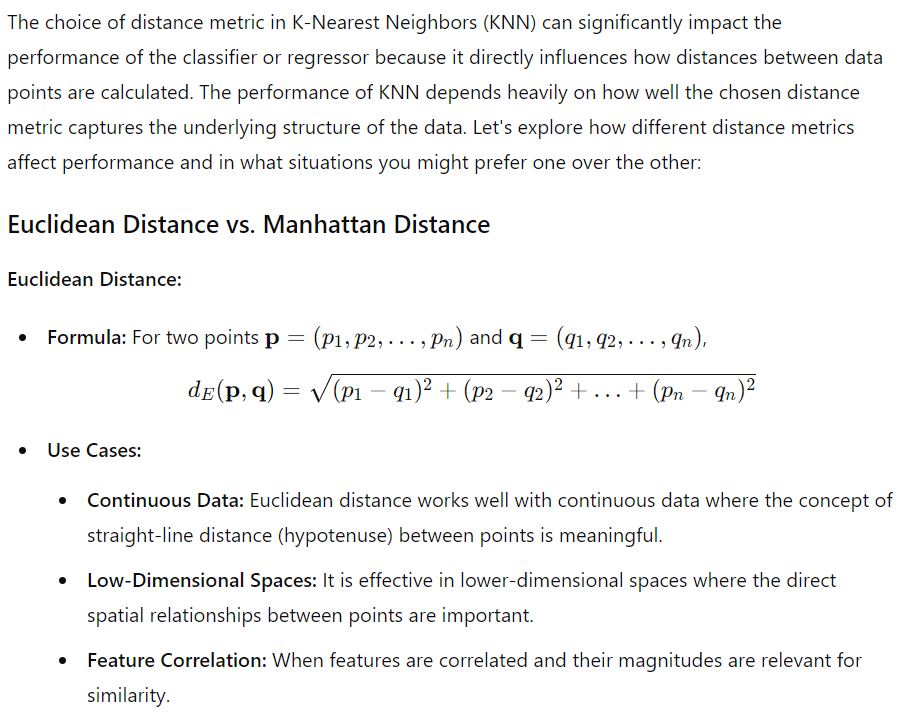
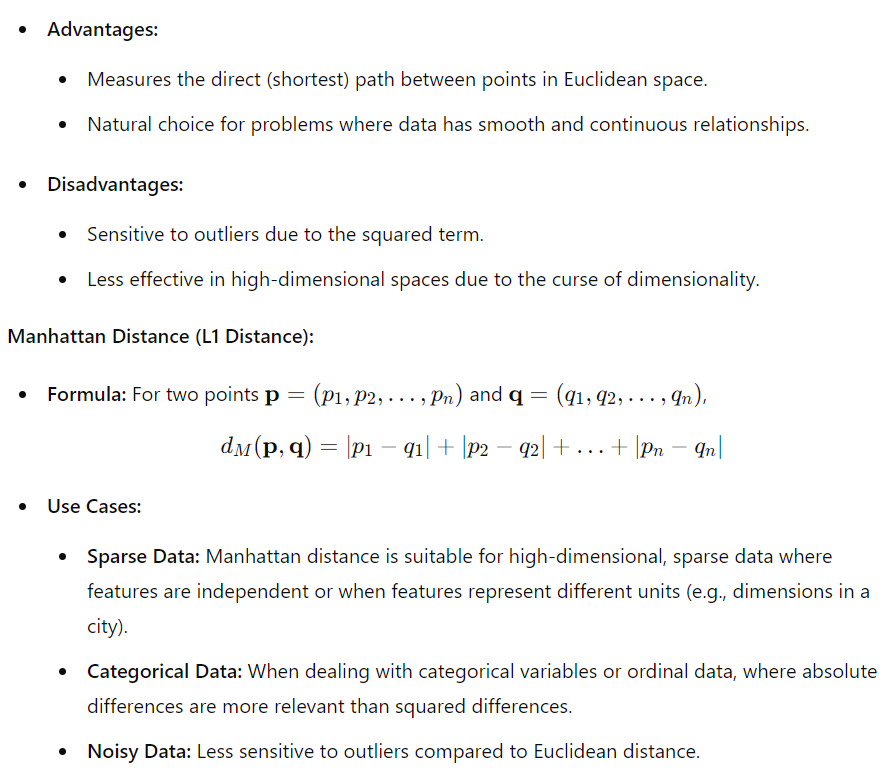
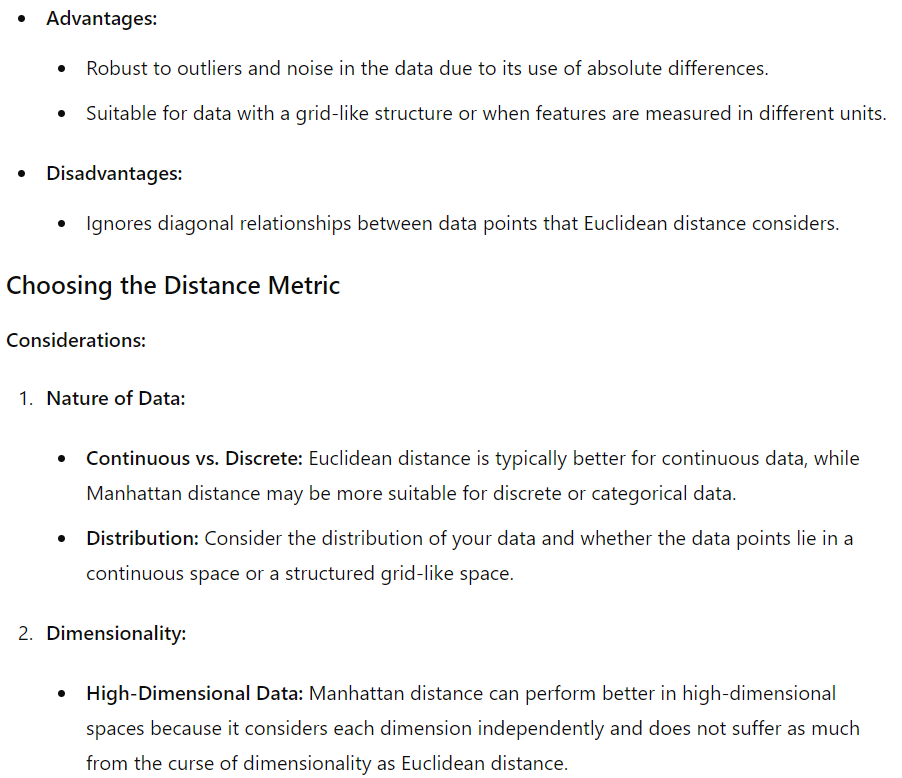
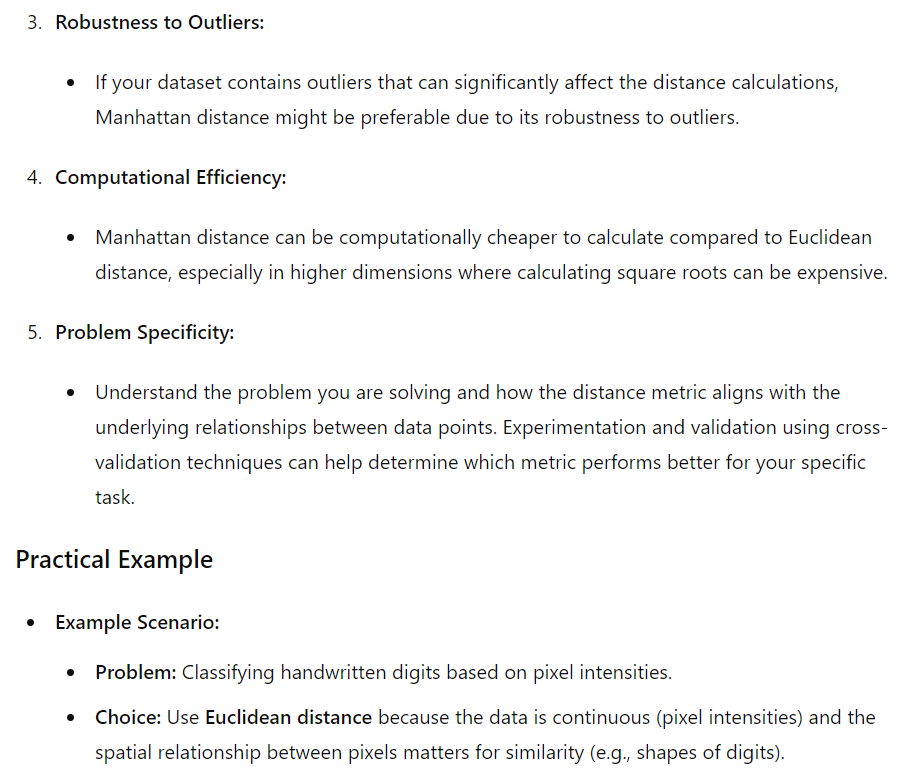
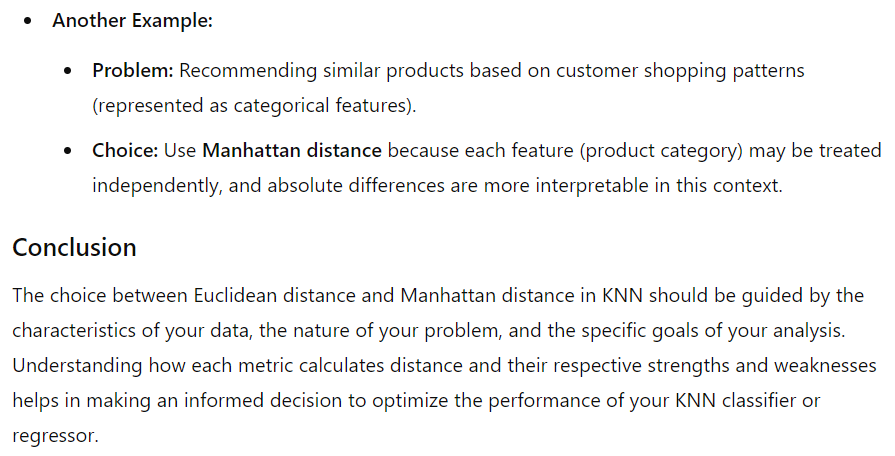

#  Q4. What are some common hyperparameters in KNN classifiers and regressors, and how do they affect the performance of the model? How might you go about tuning these hyperparameters to improve model performance?


In K-Nearest Neighbors (KNN) classifiers and regressors, hyperparameters play a crucial role in determining the performance and behavior of the model. Here are some common hyperparameters in KNN and their effects on model performance, along with strategies for tuning them effectively:

### Common Hyperparameters in KNN:

1. **Number of Neighbors (\( k \))**:
   - **Definition:** Number of nearest neighbors to consider when making predictions.
   - **Effect:** 
     - **Smaller \( k \):** More sensitive to noise and outliers, potentially leading to overfitting.
     - **Larger \( k \):** Smoother decision boundary, less sensitive to individual data points, but may lead to underfitting.
   - **Tuning:** Use techniques like cross-validation to find the optimal \( k \) that balances bias and variance.

2. **Distance Metric**:
   - **Options:** Typically Euclidean distance or Manhattan distance are used, but other metrics like Minkowski distance (generalization of Euclidean and Manhattan) can also be considered.
   - **Effect:** Choice of distance metric affects how similarity between data points is calculated, directly impacting model performance.
   - **Tuning:** Experiment with different distance metrics and choose the one that best fits the structure and nature of your data.

3. **Weights (for Predictions)**:
   - **Options:** 
     - **Uniform:** All neighbors contribute equally to the prediction.
     - **Distance-based:** Closer neighbors have a greater influence on the prediction (weighted by inverse distance).
   - **Effect:** Weights alter the contribution of neighbors to the prediction, influencing how the model generalizes.
   - **Tuning:** Test both uniform and distance-based weights to see which provides better results for your dataset.

4. **Algorithm (Ball Tree, KD Tree, Brute Force)**:
   - **Options:** KNN can use different algorithms to organize data for efficient nearest neighbor search, such as Ball Tree, KD Tree, or brute force.
   - **Effect:** Choice of algorithm affects training and prediction times, particularly for large datasets.
   - **Tuning:** Select the algorithm that provides the best balance between training time and prediction accuracy based on your dataset size and characteristics.

5. **Leaf Size (for Tree-based Algorithms)**:
   - **Definition:** Minimum number of samples required to form a leaf node in the tree.
   - **Effect:** Larger leaf size can speed up the construction of the tree but may affect the quality of the model.
   - **Tuning:** Experiment with different leaf sizes to find the optimal trade-off between computational efficiency and model performance.

### Strategies for Hyperparameter Tuning:

1. **Grid Search:**
   - **Definition:** Exhaustive search over a manually specified subset of hyperparameter space.
   - **Process:** Define a grid of hyperparameters to evaluate, perform cross-validation for each combination, and select the hyperparameters that maximize model performance metrics (e.g., accuracy, mean squared error).
   - **Example (Python - scikit-learn):**

In [ ]:
     from sklearn.model_selection import GridSearchCV
     from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

     # Define the parameter grid
     param_grid = {
         'n_neighbors': [3, 5, 7, 9],
         'weights': ['uniform', 'distance'],
         'algorithm': ['ball_tree', 'kd_tree', 'brute']
     }

     # Initialize the KNN classifier or regressor
     knn = KNeighborsClassifier()  # Or KNeighborsRegressor()

     # Initialize GridSearchCV
     grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')  # Use 'neg_mean_squared_error' for regression

     # Fit GridSearchCV
     grid_search.fit(X_train, y_train)  # X_train, y_train are your training data

     # Get the best hyperparameters and its corresponding score
     best_params = grid_search.best_params_
     best_score = grid_search.best_score_

     print("Best Hyperparameters:", best_params)
     print("Best Cross-Validation Score:", best_score)

2. **Randomized Search:**
   - **Definition:** Randomly sample hyperparameters from a distribution of possible values.
   - **Process:** Unlike grid search, which evaluates all combinations, randomized search evaluates a fixed number of parameter settings drawn from specified probability distributions.
   - **Use Case:** When the search space is large, randomized search can be more efficient than grid search.

3. **Cross-Validation:**
   - **Definition:** Technique to assess how the results of a statistical analysis generalize to an independent dataset.
   - **Process:** Split the data into multiple subsets (folds), train the model on several folds, and validate it on the remaining fold. Repeat this process multiple times and average the results to get an estimate of the model’s performance.
   - **Importance:** Helps to ensure that the model generalizes well to unseen data and provides robust estimates of hyperparameter performance.

4. **Domain Knowledge:**
   - **Definition:** Understand the problem domain and characteristics of the data.
   - **Process:** Use domain knowledge to inform decisions about which hyperparameters are likely to be most important and where to focus tuning efforts.

### Conclusion:

Hyperparameter tuning in KNN involves selecting values for parameters like \( k \), distance metric, weights, and algorithm that maximize the model's performance. By systematically exploring different combinations of hyperparameters using techniques like grid search, randomized search, and cross-validation, you can optimize your KNN classifier or regressor to achieve better accuracy and generalization on unseen data. Understanding the impact of each hyperparameter and their interactions with your dataset is key to successful tuning.

# Q5. How does the size of the training set affect the performance of a KNN classifier or regressor? What techniques can be used to optimize the size of the training set?



The size of the training set in K-Nearest Neighbors (KNN) can significantly influence the performance of both classifiers and regressors. Here’s how the size of the training set affects KNN and techniques to optimize it:

### Impact of Training Set Size on KNN Performance:

1. **Bias-Variance Trade-off:**
   - **Smaller Training Set:**
     - **Effect:** With fewer training examples, the model may not capture the underlying data distribution well, leading to high bias (underfitting). The decision boundary might be overly simplistic and not generalize well to new data.
     - **Risk:** Increased sensitivity to noise and outliers in the training data.
   - **Larger Training Set:**
     - **Effect:** More training examples provide a better representation of the data distribution, leading to lower bias and potentially lower variance (if the model is not overly complex).
     - **Benefit:** The model can generalize better to new, unseen data, resulting in improved performance metrics (accuracy for classification, mean squared error for regression).

2. **Computational Complexity:**
   - **Smaller Training Set:**
     - Training time is generally shorter since fewer examples need to be processed.
   - **Larger Training Set:**
     - Training time increases as the number of training examples grows. This is particularly noticeable in KNN because it requires computation of distances to all training examples during prediction.

3. **Curse of Dimensionality:**
   - **Effect:** In high-dimensional spaces, a larger training set can help mitigate the curse of dimensionality by providing more representative samples across the feature space. This can lead to more accurate distance calculations and better generalization.

### Techniques to Optimize Training Set Size in KNN:

1. **Use Cross-Validation:**
   - **Purpose:** Cross-validation helps in assessing how the model generalizes to new data and can guide decisions about the appropriate size of the training set.
   - **Technique:** Divide the available data into training and validation sets multiple times (using different splits or folds), train the model on the training set, and evaluate its performance on the validation set. This process helps in understanding how performance metrics vary with different training set sizes.

2. **Incremental Learning:**
   - **Definition:** Start with a smaller training set and gradually increase its size while monitoring model performance.
   - **Benefits:** Allows for iterative improvement of the model by adding more data and observing changes in accuracy or error metrics.

3. **Data Augmentation (for Small Datasets):**
   - **Definition:** Generate additional training examples using techniques like oversampling, undersampling, or synthetic data generation.
   - **Use Cases:** Particularly useful when the original dataset is small or imbalanced, enhancing the model's ability to learn from limited data.

4. **Feature Selection and Dimensionality Reduction:**
   - **Purpose:** Reduce the number of features (dimensions) in the dataset to focus on the most informative ones.
   - **Techniques:** Use methods like principal component analysis (PCA) or feature selection algorithms (e.g., recursive feature elimination) to identify and retain the most relevant features. This can help reduce the effective size of the training set needed to achieve good performance.

5. **Ensemble Methods:**
   - **Definition:** Combine predictions from multiple models trained on different subsets of the training data.
   - **Technique:** Techniques like bagging (bootstrap aggregating) or boosting can improve generalization by aggregating predictions from models trained on various parts of the training set.

### Conclusion:

The size of the training set in KNN plays a critical role in model performance, affecting both bias and variance. Optimizing the training set size involves balancing computational considerations with the need for sufficient data to accurately capture the underlying data distribution. Techniques like cross-validation, incremental learning, data augmentation, and feature selection can help determine and improve the optimal training set size for your specific KNN classifier or regressor application.

# Q6. What are some potential drawbacks of using KNN as a classifier or regressor? How might you overcome these drawbacks to improve the performance of the model?



K-Nearest Neighbors (KNN) is a simple yet powerful algorithm for both classification and regression tasks. However, it does come with certain drawbacks that can affect its performance. Here are some potential drawbacks of using KNN and strategies to overcome them:

### Drawbacks of KNN:

1. **Computational Complexity:**
   - **Issue:** KNN requires computation of distances between the query point and all training examples, which can be computationally expensive, especially with large datasets.
   - **Solution:** 
     - Use efficient data structures like KD-trees or Ball trees for nearest neighbor search, which can speed up the process compared to brute-force computation.
     - Consider dimensionality reduction techniques like PCA to reduce the number of features and hence the computational burden.

2. **Storage of Training Data:**
   - **Issue:** KNN stores the entire training dataset for prediction, which can be memory-intensive, especially with large datasets.
   - **Solution:** 
     - For large datasets, use approximate nearest neighbor methods or data sampling techniques to reduce the amount of stored data while maintaining reasonable accuracy.
     - Consider using algorithms that can handle streaming data or online learning where the model updates incrementally as new data arrives.

3. **Sensitive to Feature Scaling:**
   - **Issue:** KNN computes distances based on the Euclidean or other distance metrics, which can be influenced by the scale and units of different features.
   - **Solution:** 
     - Normalize or standardize features to ensure that each feature contributes equally to the distance computation.
     - Use techniques like Min-Max scaling or Z-score normalization to scale features to a similar range.

4. **Curse of Dimensionality:**
   - **Issue:** KNN performance can degrade in high-dimensional spaces due to the increased sparsity of data points, making distance-based calculations less reliable.
   - **Solution:** 
     - Perform dimensionality reduction using techniques like PCA or feature selection to reduce the number of irrelevant or redundant features.
     - Consider using distance metrics that are less sensitive to high-dimensional spaces, such as Manhattan distance.

5. **Imbalanced Data and Outliers:**
   - **Issue:** KNN can be sensitive to imbalanced classes or outliers, potentially leading to biased predictions.
   - **Solution:** 
     - Handle class imbalance by using techniques like oversampling (e.g., SMOTE) or undersampling to balance the class distribution in the training data.
     - Remove or down-weight outliers in the dataset before applying KNN to avoid their undue influence on predictions.

6. **Optimal \( k \) Selection:**
   - **Issue:** Choosing the optimal number of neighbors (\( k \)) is critical and can impact the model's performance.
   - **Solution:** 
     - Use cross-validation or grid search techniques to evaluate different values of \( k \) and select the one that maximizes performance metrics (e.g., accuracy, F1-score, mean squared error).
     - Consider using algorithms that automatically adapt \( k \) based on the data, such as radius-based nearest neighbor methods.

### Conclusion:

While KNN is straightforward and easy to implement, it requires careful consideration of its drawbacks and appropriate strategies to mitigate them for optimal performance. By addressing issues related to computational complexity, storage requirements, feature scaling, dimensionality, data imbalance, outliers, and optimal parameter selection, you can enhance the effectiveness of KNN as a classifier or regressor in various applications. Always assess these factors in the context of your specific dataset and problem domain to achieve the best results with KNN.